<a href="https://colab.research.google.com/github/leogils333/ML_AI/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Slope of the Line (w)  [1.28]
Y Interceptor (b)  -12.000000000000007
New Y Predicted values f(x) = w * X + b  [13.6 20.  26.4 32.8 39.2]
Predict Ice sales at 27C  [22.56]
Cost function 1.3856406460551005
1.3856406460551005 - Cost Error is high or poor so w and b values are not correct/perfect
Cost calculation  [0.96]
Gradient calculation  (array([3.41060513e-14]), array([7.10542736e-16]))
Gradient Descent  [5.49555803e+262] [1.73553543e+261] [array([72.11207368]), array([72.11207368]), array([72.11207368]), array([72.11207368]), array([72.11207368]), array([72.11207368]), array([72.11207368]), array([72.11207368]), array([72.11207369]), array([72.11207367]), array([72.11207378]), array([72.11207291]), array([72.11208029]), array([72.11201755]), array([72.11255694]), array([72.10836882]), array([72.1731002]), array([73.72890297]), array([213.03354317]), array([10073.48951721]), array([726010.01125335]), array([52551378.33736175]), array([3.80542569e+09]), array([2.75554186e+11]), array(

<ipython-input-74-aedadcf9583f>:45: RuntimeWarning: overflow encountered in square
  cost = cost + (f_wb - Y[i])**2
<ipython-input-74-aedadcf9583f>:45: RuntimeWarning: overflow encountered in add
  cost = cost + (f_wb - Y[i])**2


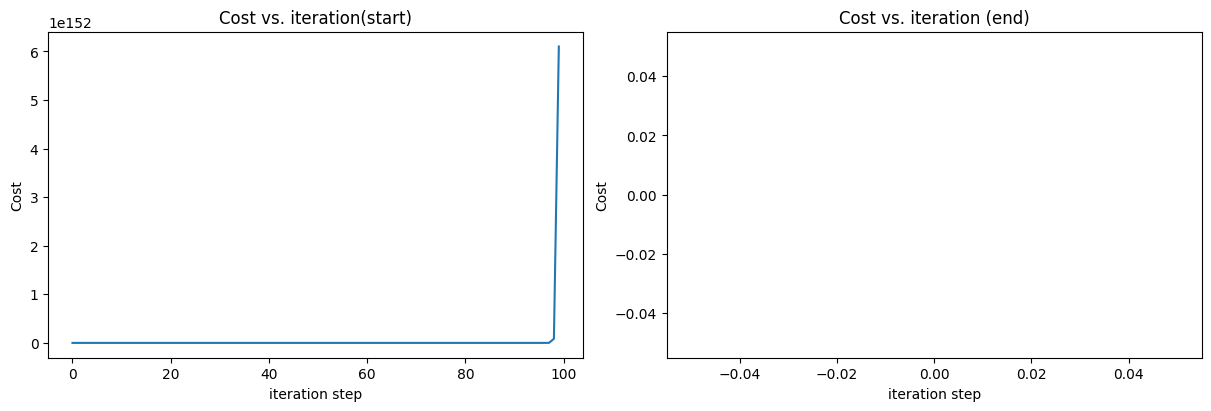

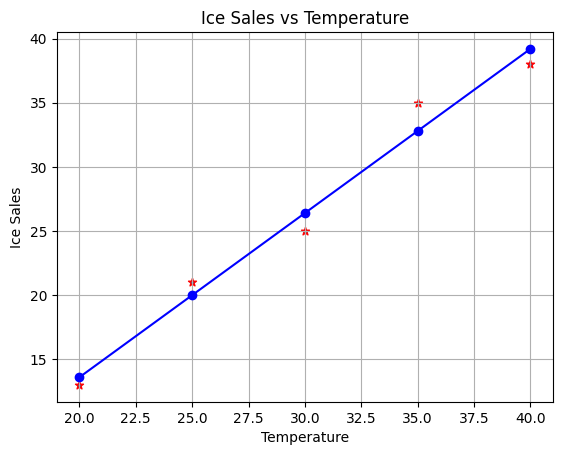

In [74]:
#NumPy is a powerful library for numerical computing in Python.
#NumPy arrays are designed for efficient storage and manipulation of numerical data
import numpy as npy
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

temperature = [20, 25, 30, 35, 40] #Python List
icesales = [13, 21, 25, 35, 38]

#Finding Linear regression values w and b by using X and Y
X = npy.array([temperature]).T #numpy array
Y = npy.array(icesales);

liregmod = LinearRegression()
liregmod = liregmod.fit(X, Y)

liregmod_slope = liregmod.coef_
liregmod_intercept = liregmod.intercept_
print('Slope of the Line (w) ',liregmod_slope)
print('Y Interceptor (b) ',liregmod_intercept)

Y_predicte = liregmod.predict(X)

print('New Y Predicted values f(x) = w * X + b ',Y_predicte)
print('Predict Ice sales at 27C ',liregmod.predict([[27]]))

#Finding Cost value to see how far the predicted value from the Actual value
rmse = npy.sqrt(mean_squared_error(Y, Y_predicte))
print('Cost function',rmse)
print(rmse, '- Cost Error is high or poor so w and b values are not correct/perfect')

#Implementing gradient descent. Need Learning rate to implement GD
learning_rate = 0.01
number_of_iteration = 300
cost_history = []

def cost_calculation(X, Y, w, b):
  #1/2m(sum of (Y_hat - y)power of 2)
  m = X.shape[0]
  cost = 0

  for i in range(m):
    f_wb = w * X[i] + b
    cost = cost + (f_wb - Y[i])**2
  total_cost = 1 / (2 * m) * cost
  return total_cost

print('Cost calculation ',cost_calculation(X, Y, liregmod_slope, liregmod_intercept))

def gradient_calculation(X, Y, w, b):
  m = X.shape[0]
  dj_dw = 0
  dj_db = 0

  for i in range(m):
    f_wb = w * X[i] + b
    dj_dw_i = (f_wb - Y[i]) * X[i]
    dj_db_i = f_wb - Y[i]
    dj_dw = dj_dw + dj_dw_i
    dj_db = dj_db + dj_db_i

  dj_dw = dj_dw / m
  dj_db = dj_db / m

  return dj_dw, dj_db

print('Gradient calculation ',gradient_calculation(X, Y, liregmod_slope, liregmod_intercept))

J_history = []
p_history = []

def gradient_descent(X, Y, w_in, b_in, alpha, number_of_iteration, cost_function, gradient_function):
  w = w_in
  b = b_in

  for i in range(number_of_iteration):
    dj_dw, dj_db = gradient_function(X, Y, w, b)

    w = w - alpha * dj_dw
    b = b - alpha * dj_db
    cost_history.append(cost_function(X, Y, w, b))
    if i< number_of_iteration:      # prevent resource exhaustion
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])

  return w, b, J_history, p_history

w_final, b_final, J_hist, p_hist = gradient_descent(X, Y, liregmod_slope, liregmod_intercept, learning_rate, number_of_iteration,
                                           cost_calculation, gradient_calculation)

print('Gradient Descent ',w_final, b_final, J_hist, p_hist)
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + npy.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step')
plt.show()

#print(cost_history)
#Draw a Diagram
plt.title('Ice Sales vs Temperature')
plt.xlabel('Temperature')
plt.ylabel('Ice Sales')
plt.scatter(temperature, icesales, marker='*', edgecolors='r')
plt.plot(temperature, Y_predicte, '-bo')
plt.grid()
plt.show()


